In [396]:
import sklearn
from sklearn.datasets import fetch_olivetti_faces
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split,cross_val_score
from skimage.color import rgb2gray
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.preprocessing.image import load_img,img_to_array 
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np

from PIL import Image

import seaborn as sns
from scipy import ndimage


In [5]:
data= fetch_olivetti_faces()
images=data['images']
target=data['target']
data=data['data']



In [322]:
#Prétraitement :

def correc_gamma(img,gamma=0.2):
    I=np.copy(img)
    I=rgb2gray(I)
    a,b=np.shape(I)
    for i in range(a):
        for j in range(b):
            I[i][j]=(I[i][j])**gamma
    return I

def gaussian_filter(img):
    
    data = np.array(img, dtype=float)
    lowpass = ndimage.gaussian_filter(data, 3)
    gauss_highpass = data - lowpass
    return gauss_highpass

def gaussian_filter2(img):
    
    data = np.array(img, dtype=float)
    lowpass = ndimage.gaussian_filter(data, 3)
    return lowpass

        

In [6]:
images[0]

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083, 0.3305785 ,
        0.30578512],
       [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083, 0.338843  ,
        0.3140496 ],
       [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528, 0.338843  ,
        0.29752067],
       ...,
       [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256, 0.16528925,
        0.17355372],
       [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033, 0.16115703,
        0.16528925],
       [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256, 0.16115703,
        0.1570248 ]], dtype=float32)

(64, 64)

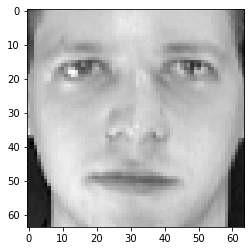

In [7]:
plt.imshow(images[0],cmap='gray')
np.shape(images[0])

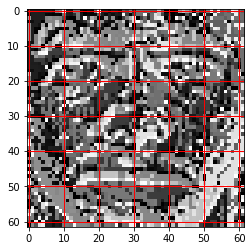

In [98]:
def lbp(image):
#     print(image.shape)
    lbp=np.zeros((len(image)-2,len(image[0])-2))
    for i in range(len(lbp)):
        for j in range(len(lbp[0])):
            lbpij=0
            if image[i][j+1]>image[i+1][j+1]:
                lbpij+=2**7
            if image[i+1][j]>image[i+1][j+1]:
                lbpij+=2**6
            if image[i+2][j]>image[i+1][j+1]:
                lbpij+=2**5
            if image[i+2][j+1]>image[i+1][j+1]:
                lbpij+=2**4
            if image[i+2][j+2]>image[i+1][j+1]:
                lbpij+=2**3
            if image[i+1][j+2]>image[i+1][j+1]:
                lbpij+=2**2
            if image[i][j+2]>image[i+1][j+1]:
                lbpij+=2 
            if image[i][j+1]>image[i][j+1]:
                lbpij+=1
            lbp[i][j]=(lbpij)
    return lbp
        

plt.imshow(lbp(images[0]*255).round(0).astype(np.uint8),cmap='gray')
plt.grid(axis='both',color='r', linestyle='-', linewidth=1)

lbp0=lbp(images[0]*255).round(0).astype(np.uint8)

(600, 480)

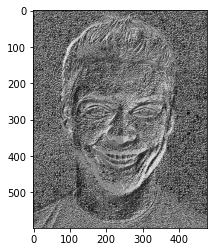

In [135]:

I=plt.imread(r'C:\Users\boite\OneDrive\Bureau\Germain\IMT_lille_douai\cybersecurite\SAFE\projet_reco_faciale\Projet_LPB\066_y_m_h_b (Petite).jpg', 0)
I=rgb2gray(I)
#plt.imshow(I,cmap='gray')
plt.imshow(lbp(I*255).round(0).astype(np.uint8),cmap='gray')

np.shape(I)
I2=lbphistogram2()

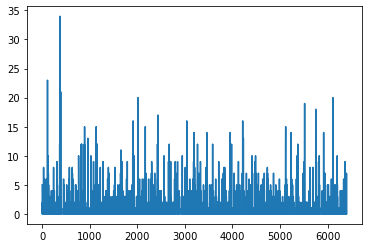

In [402]:
historigine=histo_en_bloc((lbp(I*255).round(0).astype(np.uint8)))
plt.plot(historigine)

In [408]:
  
def lbphistogram2(lbp):
    lbpflat=lbp.flatten()
    lbphistogram=np.zeros(256)
    for i in range(len(lbpflat)):
        lbphistogram[lbpflat[i]]+=1
    return lbphistogram

 

        
def histo_en_bloc(img_plb):
    
    L=np.array([]).astype(int)
    windowsize_r=img_plb.shape[0]//4
    windowsize_c=img_plb.shape[1]//4
    for r in range(0,img_plb.shape[0] - windowsize_r, windowsize_r):
        for c in range(0,img_plb.shape[1] - windowsize_c, windowsize_c):
            window = img_plb[r:r+windowsize_r,c:c+windowsize_c]
            hist=lbphistogram2(window).astype(int)
            L=np.concatenate((L,hist),axis=None)
    return L

    
    
lbp60=lbp(images[60]*255).round(0).astype(np.uint8)

hist0=histo_en_bloc(lbp0)
# plt.plot(hist0)
hist2=histo_en_bloc(lbp2)
print(np.shape(hist2))
# plt.plot(hist2)
hist60=histo_en_bloc(lbp60)
# plt.plot(hist10)

lbp7=lbp(images[7]*255).round(0).astype(np.uint8)
lbp15= lbp(images[15]*255).round(0).astype(np.uint8)       
lbp8=lbp(images[8]*255).round(0).astype(np.uint8)
lbp6= lbp(images[6]*255).round(0).astype(np.uint8)    
lbp9=lbp(images[9]*255).round(0).astype(np.uint8)
lbp3= lbp(images[3]*255).round(0).astype(np.uint8)       
lbp21=lbp(images[21]*255).round(0).astype(np.uint8)
lbp18= lbp(images[18]*255).round(0).astype(np.uint8)  
hist7=histo_en_bloc(lbp7)
hist15=histo_en_bloc(lbp15)
hist8=histo_en_bloc(lbp8)
hist9=histo_en_bloc(lbp9)
hist6=histo_en_bloc(lbp6)
hist3=histo_en_bloc(lbp3)
hist21=histo_en_bloc(lbp21)
hist18=histo_en_bloc(lbp18)

# lbp1=lbp(images[1]*255).round(0).astype(np.uint8)
# lbp45= lbp(images[45]*255).round(0).astype(np.uint8)       
lbp70=lbp(images[70]*255).round(0).astype(np.uint8)

hist1=histo_en_bloc(lbp1)
# plt.plot(hist1)
hist45=histo_en_bloc(lbp45)
# plt.plot(hist45)
hist70=histo_en_bloc(lbp70)
# plt.plot(hist67)

# print(np.linalg.norm(hist0-hist2))
# print(np.linalg.norm(hist0-hist10))
# print(np.linalg.norm(hist0-hist1))
# print(np.linalg.norm(hist0-hist45))
# print(np.linalg.norm(hist1-hist67))
# print(np.linalg.norm(hist45-hist67))
# print(np.linalg.norm(hist2-hist1))
# print(np.linalg.norm(hist10-hist45))


(4096,)


In [409]:
Liste_hist=[]
for i in range(len(images)):
    lbp_=lbp(images[i]*255).round(0).astype(np.uint8)
    L=histo_en_bloc(lbp_)
    Liste_hist.append(L)



Liste_hist_traitee=[]
for i in range(len(images)):
    I=correc_gamma(images[i])
    I=gaussian_filter(I)
    lbp_=lbp(I*255).round(0).astype(np.uint8)
    L=histo_en_bloc(lbp_)
    Liste_hist_traitee.append(L)

C:\Users\boite\AppData\Local\Temp/ipykernel_38596/2588841506.py:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  I=rgb2gray(I)


In [410]:
#données non_traitees
X=Liste_hist
y=[]
l=0
while l <= 39 :
    for k in range(10):
        y.append(l)
    l+=1
   
#Données traitees
X_traitees=Liste_hist_traitee
y=[]
l=0
while l <= 39 :
    for k in range(10):
        y.append(l)
    l+=1

In [411]:
def chi2_distance(A, B):
    chi=0
    for i in range(len(A)):
        if (A[i],B[i])!=(0,0):
            chi += 0.5 * np.sum(((A[i] - B[i]) ** 2) / (A[i] + B[i]))
    return chi

chi2_distance(Liste_hist[6], Liste_hist[0])


L1=[chi2_distance(Liste_hist[i], Liste_hist[0]) for i in range(400)]
min(L1[1:])

635.4858058758806

In [405]:
def prediction(xi_test,X_train,y_train):
    L1=[chi2_distance(xi_test, X_train[i]) for i in range(len(y_train))]
    indice_min=L1.index(min(L1))
    print(indice_min)
    y_pred=y_train[indice_min]
    return y_pred

print(prediction(Liste_hist[9],x_train,y_train))

144
20


In [412]:

x_test=[]
y_test=[]
x_train=[]
y_train=[]
identities=[i for i in range(40)]
label=0
for i in range(len(images)):
    if y_train.count(label)<7:  
        x_train.append(X_traitees[i])
        y_train.append(label)
    else:
        x_test.append(X_traitees[i])
        y_test.append(label)
        
    if y_test.count(label)>=3:
        label+=1
        

print(np.shape(y_train))

print(np.shape(y_test))       
x_train=np.array(x_train)
y_train=np.array(y_train)
#y_train=to_categorical(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
#y_test=to_categorical(y_test)
print("dimensions du set d'entraînement: ",np.shape(x_train))
print("dimensions du set de test: ",np.shape(x_test))
print("les différentes identitées sont: ",identities)

(280,)
(120,)
dimensions du set d'entraînement:  (280, 4096)
dimensions du set de test:  (120, 4096)
les différentes identitées sont:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [413]:
from sklearn import neighbors
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.metrics import accuracy_score, classification_report
# classif_knn = neighbors.KNeighborsClassifier(10)
# classif_knn.fit(iris["data"], iris["target"])
# KNeighborsClassifier(algorithm='auto', leaf_size=30,metric='minkowski',metric_params=None, n_jobs=None, n_neighbors=10, p=2,weights='uniform')

#train the algorithm
# knn = KNeighborsClassifier(n_neighbors=1, algorithm='auto',leaf_size=30, metric =chi2_distance) 
# knn.fit(x_train, y_train)
#test
# y_pred = knn.predict(x_test)


# y_pred=[prediction(xi_test,x_train,y_train) for xi_test in x_test]


print("Accuracy score:{:0.2f}".format(sklearn.metrics.accuracy_score(y_test, y_pred)))



Accuracy score:0.94


Base non_traitee, split=0.7 : accuracy= 0.9416666 

Base non_traitee, et split=0.8 : accuracy=0.95  

Base traitee, split=0.8 : accuracy=0.975  

Base traitee, split=0.7 : accuracy=0.98333333  

 


In [344]:
print(y_test)
print(y_pred)
print(accuracy_score(y_test, y_pred))


[ 0  0  0  1  1  1  2  2  2  3  3  3  4  4  4  5  5  5  6  6  6  7  7  7
  8  8  8  9  9  9 10 10 10 11 11 11 12 12 12 13 13 13 14 14 14 15 15 15
 16 16 16 17 17 17 18 18 18 19 19 19 20 20 20 21 21 21 22 22 22 23 23 23
 24 24 24 25 25 25 26 26 26 27 27 27 28 28 28 29 29 29 30 30 30 31 31 31
 32 32 32 33 33 33 34 34 34 35 35 35 36 36 36 37 37 37 38 38 38 39 39 39]
[11, 0, 0, 1, 1, 1, 2, 11, 20, 3, 3, 3, 4, 4, 39, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 8, 3, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33, 34, 34, 34, 35, 1, 35, 36, 36, 36, 37, 37, 37, 38, 38, 38, 39, 39, 39]
0.9416666666666667


1316.4015331057053
1366.390971410933
3
[7 0 2 ... 0 6 0]


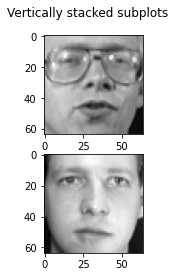

In [394]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
ax1.imshow(images[15],cmap='gray')
ax2.imshow(images[7],cmap='gray')

print(chi2_distance(hist15,hist7))
# fig, axs = plt.subplots(3, sharex=True, sharey=True)
# fig.suptitle('Sharing both axes')
# axs[0].plot(imshow(images)
# axs[1].plot(

L1=[chi2_distance(Liste_hist[7], x_train[8+i]) for i in range(15)]
indice_min=L1.index(min(L1))
print(L1[indice_min])
print(indice_min)
print(x_train[8+indice_min])
# for i in range(30):
#     print(Liste_hist[i])

# 7+3+4



In [353]:
# plt.figure(1, figsize=(12,8))
# sns.heatmap(confusion_matrix(y_test, y_pred))


1